## **TRABALHO 2 DE PROCESSAMENTO DIGITAL DE SINAIS**
Alunos: 
            Keli Tauana Prass Ruppenthal,
            Moisés Goulart de Oliveira,
            Victor Dallagnol Bento e
            Yuri Oliveira

### **Métodos utilizados:**
*   **numpy:** para gerar o audio.
*   **IPython.display:** para trocar o audio.
*   **scipy.signal:** para carregar filtros e funções.
*   **matplotlib.pyplot:** para plotar.
*   **librosa:** Auxilia na visualização do áudio.


In [1]:
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import librosa
import librosa.display

%matplotlib inline

Função *OverLap-Save*.

In [2]:
def overlapsave (x, h):
    L = len(x)  # length of input signal
    N = len(h)  # length of impulse response
                #P length of segments
    P = len(h)+1
    # overlap-save convolution
    nseg = (L+N-1)//(P-N+1) + 1
    x = np.concatenate((np.zeros(N-1), x, np.zeros(P)))
    xp = np.zeros((nseg, P))
    yp = np.zeros((nseg, P))
    y = np.zeros(nseg*(P-N+1))
    print(str(nseg) + ' blocos')
    for p in range(nseg):
        xp[p, :] = x[p*(P-N+1):p*(P-N+1)+P]
        yp[p, :] = np.fft.irfft(np.fft.rfft(xp[p, :]) * np.fft.rfft(h, P))
        y[p*(P-N+1):p*(P-N+1)+P-N+1] = yp[p, N-1:]
    y = y[0:N+L]
    return y


O *LibROSA* é um pacote python para análise de música e áudio. Ele fornece os blocos de construção necessários para criar sistemas de recuperação de informações musicais.

In [3]:
x, sr = librosa.load('audio/strokes.wav') 
print(x.shape, sr)

(637093,) 22050


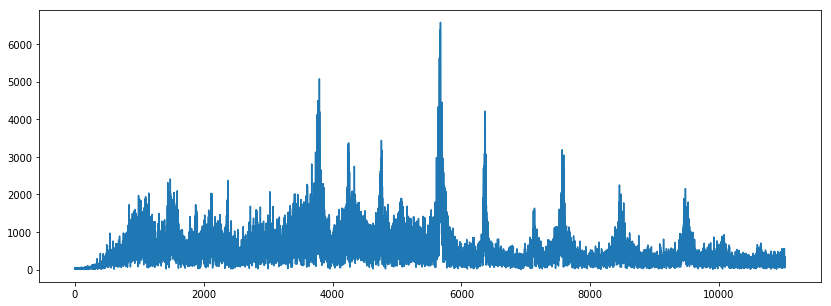

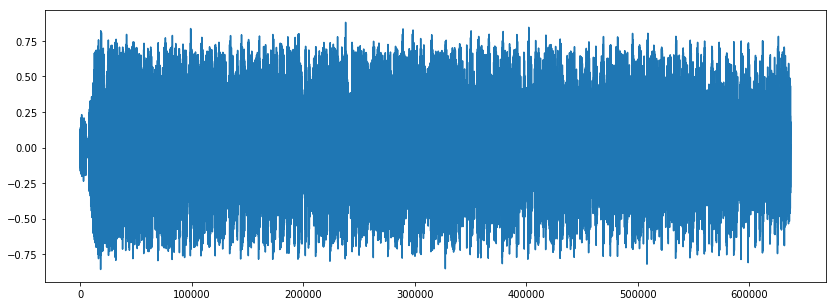

In [4]:
# plota amostra do sinal de entrada
fftSig = abs(np.fft.rfft(x))
plt.figure(figsize=(14, 5))
plt.plot(fftSig[:sr//2]) #até 20k que é onde ouvimos
plt.show()

plt.figure(figsize=(14, 5))
plt.plot((x)) #grafico da entrada


In [5]:
maxFreq = np.argmax(fftSig)
print(maxFreq)

5676


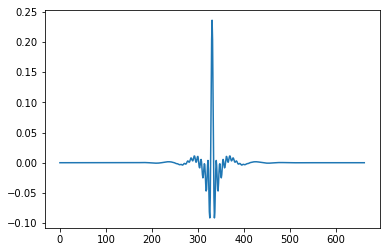

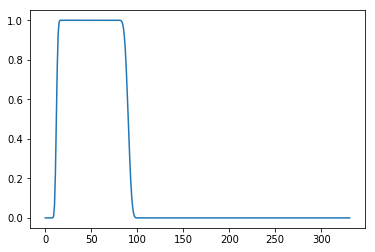

In [29]:
# Filtro passa faixa


# Configuration.
fS = 22050  # Sampling rate.
fL = 400  # Cutoff frequency.
fH = 3000  # Cutoff frequency.
NL = 461  # Filter length for roll-off at fL, must be odd.
NH = 203  # Filter length for roll-off at fH, must be odd.

# Compute a low-pass filter with cutoff frequency fH.
hlpf = np.sinc(2 * fH / fS * (np.arange(NH) - (NH - 1) / 2.))
hlpf *= np.blackman(NH)
hlpf /= np.sum(hlpf)

# Compute a high-pass filter with cutoff frequency fL.
hhpf = np.sinc(2 * fL / fS * (np.arange(NL) - (NL - 1) / 2.))
hhpf *= np.blackman(NL)
hhpf /= np.sum(hhpf)
hhpf = -hhpf
hhpf[(NL - 1) // 2] += 1

# Convolve both filters.
h = np.convolve(hlpf, hhpf)
plt.plot(h)
plt.show()
plt.plot(abs(np.fft.rfft(h)))

318878 blocos


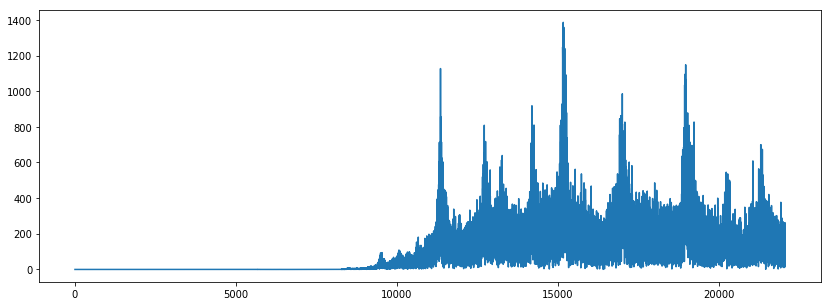

In [11]:
Y = overlapsave(x,h)
# Y = np.convolve(x,h)
plt.figure(figsize=(14, 5))
plt.plot(abs(np.fft.rfft(Y))[:sr]) # sinal de saída filtrado

Verificação do audio final.

In [8]:
# entrada 
ipd.Audio(x, rate=sr)

In [9]:
# saida
ipd.Audio(Y, rate=sr)

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:954: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


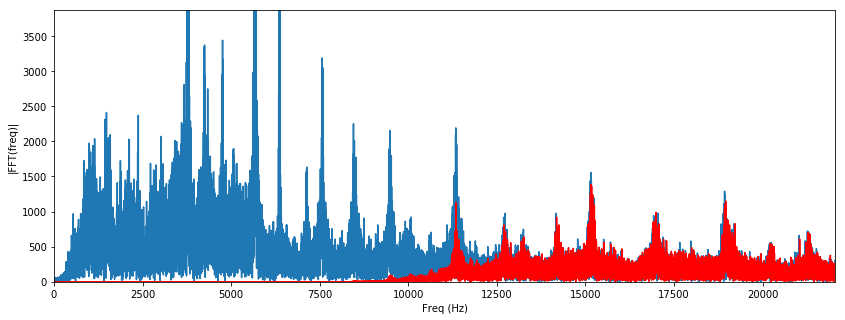

In [21]:
fft_x = np.fft.rfft(x)
fft_y = np.fft.rfft(Y)
plt.figure(figsize=(14, 5))

plt.plot(abs(fft_x))
plt.hot()
plt.plot(abs(fft_y), 'r-')
plt.xlim((0, sr))
plt.ylim((0, fft_x.max()))
plt.xlabel("Freq (Hz)")
plt.ylabel("|FFT(freq)|");

A escala em db ajuda a entender o funcionamento do filtro, 

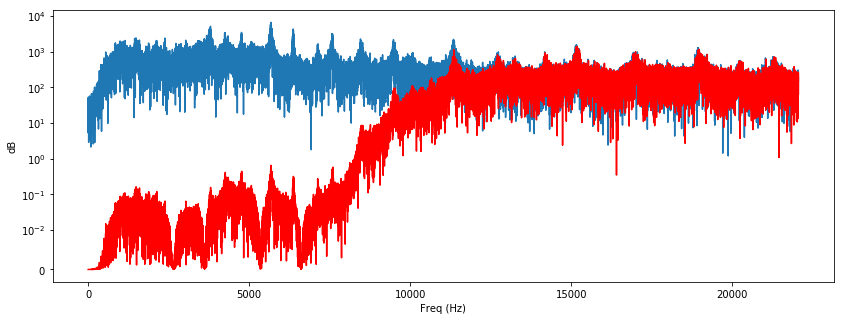

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(abs(fft_x[:sr]))
plt.plot(abs(fft_y[:sr]), 'r-')
plt.yscale('symlog', linthreshy=0.01)
plt.xlabel("Freq (Hz)")
plt.ylabel("dB");

**Referencias**
* https://fiiir.com/
* http://www.numpy.org/
* https://librosa.github.io/librosa/
* https://musicinformationretrieval.com/ipython_audio.html
* https://dsp-nbsphinx.readthedocs.io/en/nbsphinx-experiment/nonrecursive_filters/segmented_convolution.html

ModuleNotFoundError: No module named 'google.colab'